## Clase teórica 04

1. **Modelado de datos en Power BI**. 

Como sabemos de módulos anteriores, muy pocas veces nuestros datos provienen de una sola fuente. Por esta razón, el modelado de datos, que implica organizar y estructurar las relaciones entre distintas tablas, es una parte esencial de nuestro trabajo como analistas. 

En primera instancia, el proceso de creación del modelo de datos implica la definición de los requerimientos de datos del negocio y la creación de un sistema de datos coherente. Luego, ese modelo será actualizado y mantenido continuamente, acorde a los cambios del negocio y de sistemas.

> 1. **Tablas de hechos y dimensionales. Tipos de modelos**

Por lo general solemos tener una tabla de hechos con los registros transaccionales de nuestro proyecto (es decir, con métricas o hechos que los usuarios desean analizar) y una o varias tablas dimensionales que proporcionan contexto adicional a los datos en la tabla de hechos, conteniendo atributos descriptivos y/o cualitativos que se utilizan para filtrar, agrupar y etiquetar los datos en los análisis.

Estas tablas, al relacionarse, crearán el modelo de datos en Power BI. Los dos tipos de modelo más comunes son:

1. **Modelo en Estrella**:
El modelo en estrella es una de las estructuras de modelado de datos más simples. En este modelo la tabla de hechos está en el centro y las tablas de dimensiones están alrededor de la tabla de hechos y están conectadas directamente a ella.

<div align="center">
   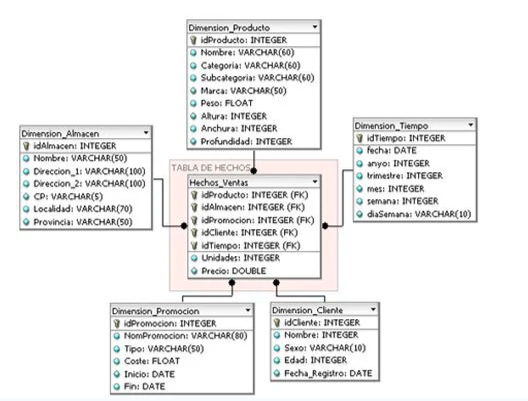
</div>

2. **Modelo en Copo de Nieve**:
El modelo en copo de nieve es una variación del modelo en estrella donde las tablas de dimensiones están normalizadas. En este modelo, si bien la tabla de hechos también está en el centro, las tablas de dimensiones pueden estar divididas en múltiples tablas relacionadas. Esto reduce la redundancia de datos, pero puede complicar las consultas y disminuir el rendimiento.

<div align="center">
   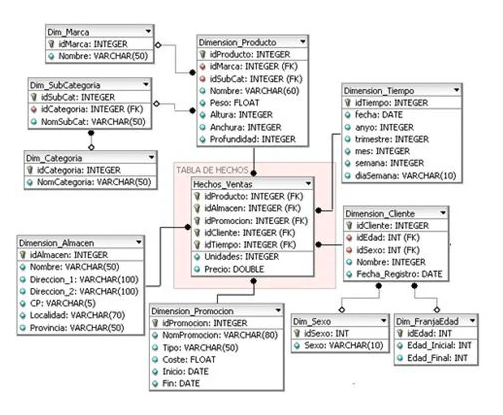
</div>

En ambos casos, las relaciones deberán crearse utilizando columnas llave o keys que idealmente serán IDs. Estas keys deberán tener el mismo tipo de datos (si bien es recomendable que también tengan el mismo nombre de columna, esto no es imprescindible para que funcione la conexión)

Es poco común que las tablas en un modelo no estén relacionadas a otras tablas. Cuando existen estas “tablas desconectadas”, generalmente su propósito no es propagar filtros a otras tablas, sino que sirven para generar inputs útiles para ciertos cálculos.

Por ejemplo, una tabla desconectada que contenga los distintos tipos de cambio de varias monedas, podría ser útil como input para convertir montos de ventas a la moneda específica que elija el usuario. Otro ejemplo son los parámetros en Power BI, que crean estas tablas desconectadas para utilizar como inputs.

> **2. Power Query: anexar y combinar tablas**

Como vimos en clases anteriores, en Power BI las conexiones y transformaciones de datos se realizan en el editor de consultas Power Query. Allí podremos generar todos nuestros pasos de ETL y visualizar el resultado de cada paso. Así mismo, será en Power Query donde nos aseguraremos de tener las columnas necesarias para generar las relaciones de nuestro modelo de datos. 

El primer paso en el armado de nuestro modelo en Power BI será, entonces, cargar cada una de nuestras fuentes de datos en Power Query y realizar la limpieza necesaria. 

<div align="center">
   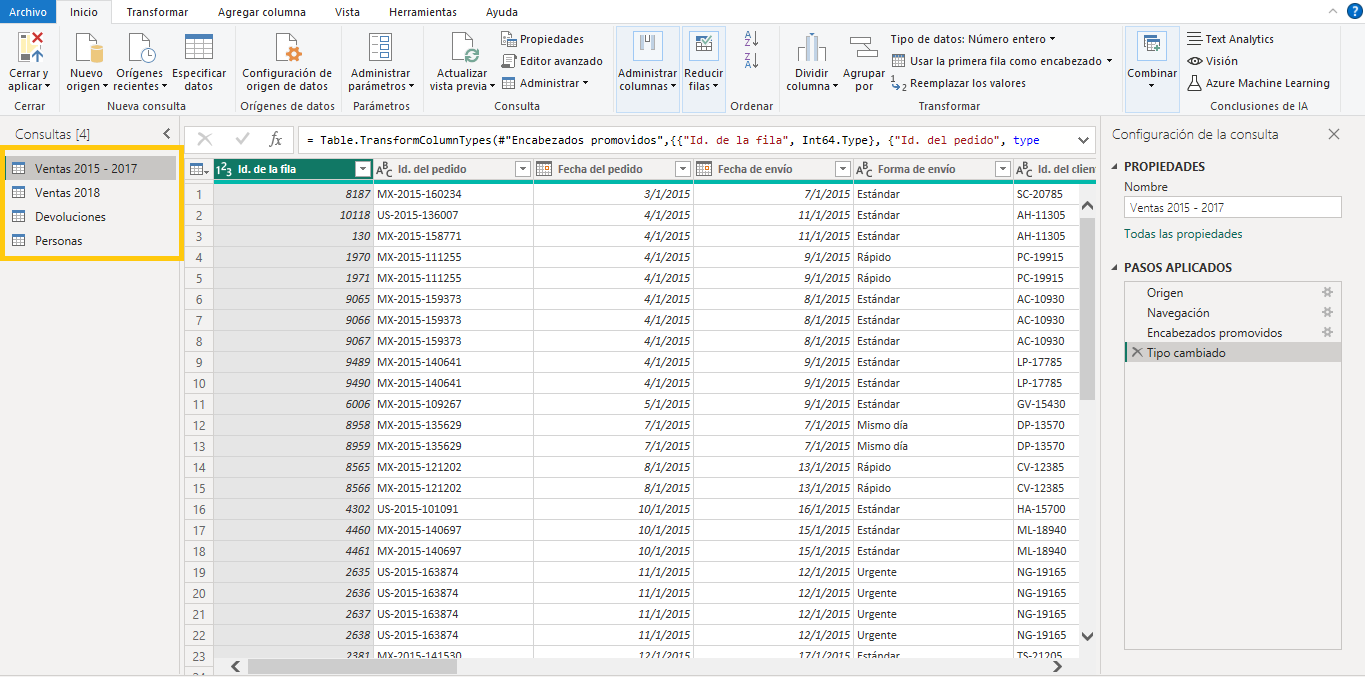
</div>

Vale la pena aclarar que si bien los orígenes de datos pueden ser diversos (Excel, CSV, bases de datos, JSON, etc), una vez que las tablas están cargadas en Power Query se unifican como elementos y pueden relacionarse sin importar si vienen del mismo tipo de origen o no.

Una vez cargadas nuestras tablas hay dos acciones de modelado que podemos realizar en Power Query: Anexar consultas y Combinar consultas.

<div align="center">
   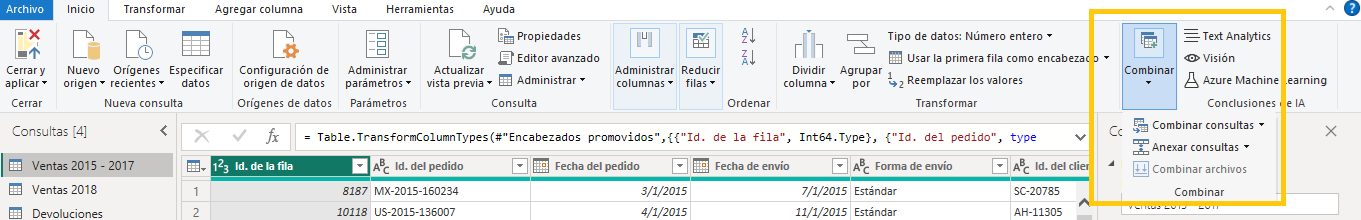
</div>

1. **Anexar consultas**:
Esta es la funcionalidad que nos permitirá hacer una union entre tablas. Para poder utilizarla primero debemos asegurarnos de que las dos tablas que queremos anexar tienen las mismas columnas, con los mismos nombres, en el mismo orden. 

En nuestro ejemplo, tenemos en una tabla las ventas de 2015 a 2017 y en otra las ventas de 2018. Podemos elegir “Anexar las consultas” o “Anexar las consultas para crear una nueva”. En este caso, elegiremos crear una nueva y la llamaremos “Ventas totales”

`Video S02-C04-E2.3.Anexar consultas`

Una vez anexadas las columnas tendremos toda nuestra información de ventas en un solo lugar. 

Veremos que, si bien hemos creado una nueva tabla de hechos, las dos tablas originales (2015-2017 y 2018) siguen en nuestro Power Query. No debemos ni podemos eliminar estas tablas pero sí es una buena práctica deshabilitar la carga para no tener repetida la información. Para hacerlo debemos hacer clic derecho sobre el nombre de cada una de las tablas y des-cliquear **“Habilitar cargar”**.

<div align="center">
   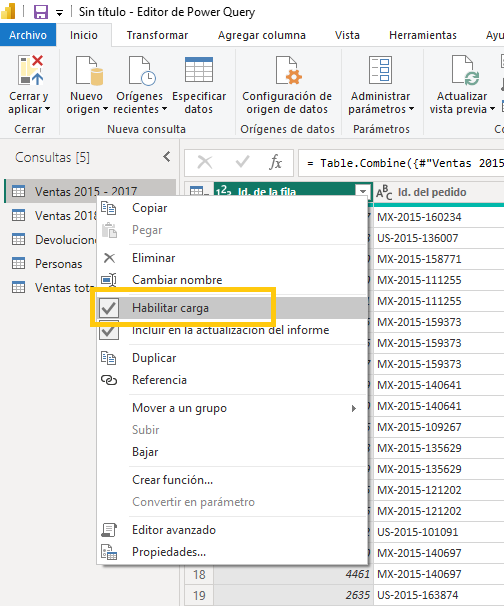
</div>

Cuando cerremos y apliquemos nuestro trabajo en Power Query veremos que en el panel de datos no aparecerán las tablas deshabilitadas.

2. **Cambiar consultas**:
Esta es la funcionalidad que nos permitirá hacer un join entre tablas. Para hacerlo debemos situarnos sobre nuestra tabla de hechos (en este caso, Ventas totales) y elegir la opción Combinar consultas.

Se abrirá una nueva pantalla de diálogo donde deberemos seleccionar con qué tabla queremos combinar nuestra tabla inicial, marcar la columna por la cual queremos hacer el join, elegir el tipo de combinación y luego clickear Aceptar.

Al igual que en SQL, el tipo de join puede ser:
- Left Outer Join / Externa izquierda
- Right Outer Join / Externa derecha
- Full Outer Join / Externa completa
- Inner Join / Interna
- Left Anti Join / Anti-izquierda
- Right Anti Join / Anti-derecha

Una vez hecha la combinación, se agregará una columna a nuestra tabla inicial con el nombre de la tabla que combinamos. Allí debemos elegir qué columnas de la nueva tabla queremos desplegar. 

`Video S02-C04-E2.5.Combinar consultas`

> 3. **Vista del modelo: relaciones, cardinalidad y dirección de filtrado.**:


Esta vista nos permite relacionar columnas de distintas tablas de manera sencilla y tener una visión general del modelo de datos lógico. Además, desde aquí se pueden configurar distintas características de estas relaciones como la cardinalidad y la dirección del filtro. 

<div align="center">
   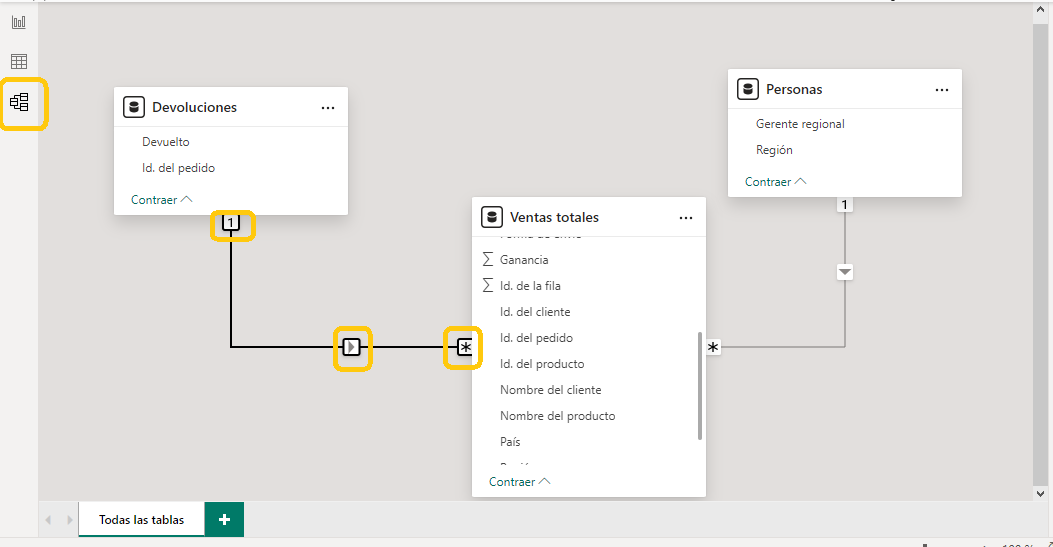
</div>

La relación entre dos tablas y sus características estarán representadas por una línea con un número o un asterisco en sus extremos así como una flecha que indica la dirección del filtrado.

Cuando conectamos dos o más tablas al mismo tiempo, Power BI intentará automáticamente detectar relaciones entre dichas tablas Sin embargo, es importante revisar las relaciones creadas automáticamente y actualizar las que están mal definidas. Así mismo, también podemos crear nuevas relaciones manualmente de dos formas:

1. Arrastrando la columna desde una tabla hasta su equivalente en la otra tabla.
2. Desde el menú Administrar relaciones.

`Video S02-C04-E3. Crear relaciones`

Es importante aclarar que las columnas relacionadas deben tener el mismo tipo de datos.

1. **Cardinalidad**

La cardinalidad puede ser de cuatro tipos:
- **Varios-a-uno (*:1)**: Indica una columna donde hay valores duplicados en la primera tabla y valores únicos en la segunda tabla.
- **Uno-a-varios (1:*)**: Es igual pero inversa en dirección a la cardinalidad Varios-a-uno (*:1). Indica una columna donde hay valores únicos en la primera tabla y valores duplicados en la segunda tabla.
- **Uno-a-uno (1:1)**: la relación uno-a-uno significa que ambas columnas contienen valores únicos. Este tipo de cardinalidad no es óptima ya que almacena datos redundantes.
- **Varios-a-varios (*:*)**: la relación varios-a-varios significa que ambas columnas contienen valores duplicados. Este tipo de relación no es frecuentemente usada y generalmente es útil cuando se diseña un modelo con requerimientos complejos.

2. **Dirección de filtro**

Cuando existe una relación entre dos columnas de tablas distintas, no las estamos combinando, sino que se crea un vínculo lógico. Las relaciones dentro del modelo lógico de Power BI propagan los filtros realizados en columnas de una tabla hacia otras tablas del modelo. La dirección de filtro puede ser “único” o “ambos”. 

- En el caso de las relaciones de uno a varios o varios a uno, la dirección del filtro cruzado siempre es del lado “uno” y, opcionalmente, desde el lado “varios” (bidireccional).

- En el caso de las relaciones uno a uno, la dirección del filtro cruzado siempre es de ambas tablas.

- En el caso de las relaciones varios a varios, la dirección del filtro cruzado puede ser desde cualquiera de las tablas o desde ambas tablas.

Siempre hay que tener en cuenta que cuando los tipos de cardinalidad tengan
un lado “uno”, los filtros siempre se propagarán desde ese lado.

Es importante saber, además, que las relaciones bidireccionales pueden afectar negativamente al rendimiento del modelo. Así mismo, intentar configurar una relación bidireccional podría producir rutas de propagación de filtro ambiguas. En este caso, es posible que Power BI no pueda confirmar el cambio de relación y avise con un mensaje de error.

3. **Relaciones activas/inactivas**
Debemos saber que entre dos tablas se pueden definir múltiples relaciones pero solo una está activa. Las relaciones inactivas aparecerán con una línea punteada. 

Las relaciones inactivas solo pueden activarse durante la evaluación de un cálculo del modelo. Esto se consigue utilizando la función **DAX USERELATIONSHIP()**.

4. **Relaciones entre las fuentes de datos y DAX**
 
Existen distintas funciones DAX que utilizamos en torno al modelo de datos. Las más comunes son: 

- **RELATED(Tabla[Columna])**: se utiliza para obtener un valor de una columna en una tabla relacionada. Es útil cuando necesitamos traer información de una tabla relacionada a la tabla actual.

- **RELATEDTABLE(Tabla)**: devuelve una tabla que contiene todas las filas relacionadas de una tabla relacionada en el modelo. Es útil para realizar cálculos agregados en las filas relacionadas.

- **USERELATIONSHIP(Tabla1[Columna1], Tabla2[Columna2])**: permite activar una relación específica entre dos tablas cuando hay múltiples relaciones entre ellas. Se utiliza en funciones que aceptan un contexto de relación como CALCULATE.

- **CROSSFILTER(Tabla1[Columna1], Tabla2[Columna2], dirección)**: modifica la dirección de la filtración entre dos columnas relacionadas. Esto es útil cuando deseamos cambiar la propagación del filtro en una relación.

- **COMBINEVALUES(<Delimitador>, <Valor1>, <Valor2>, ...)**: concatena dos o más valores (generalmente texto) en un solo valor utilizando un delimitador especificado.

- **TREATAS(<Tabla de valores>, [Columna1], [Columna2], ...)**:  toma una tabla de valores y los trata como si fueran una columna en otro contexto. Esto permite aplicar filtros de una tabla a otra que no están relacionadas directamente.

**5. Rol del Data Analyst en el modelado de datos**

En un esquema tradicional, el analista de datos no suele trabajar definiendo o actualizando el modelo de datos pero sí deberá consultar las fuentes de datos y  replicar el modelo de datos en Power BI. Para ello, será imprescindible entender el negocio que estamos analizando, qué entidades tiene nuestro modelo y cómo se relacionan así como poder analizar qué problemas puede traer el diseño actual para sus análisis.

Por otra parte, suele ocurrir que como analistas combinamos distintas fuentes de datos y armamos entonces pequeños modelos de datos propios para los análisis que queremos llevar a cabo. Estos podrían pensarse como prototipos de modelos de datos. Idealmente, y si el análisis impacta al negocio, deberían ser implementados al modelo de datos general de la organización. Pero debemos tener en cuenta que este es un proceso de desarrollo costoso y puede ser complejo.

Es por esto que es importante que como analistas de datos entendamos el modelo de datos, cómo vincular distintas fuentes de datos y cómo relacionar esas fuentes coherentemente. De esta forma, nos aseguramos de que nuestros análisis sean correctos y que los orígenes de datos sean compatibles con dicho análisis.


In [ ]:
##############################################################################################################################